In [3]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
from tensorflow.keras.layers import TextVectorization

In [4]:
yelp, info = tfds.load("yelp_polarity_reviews", with_info=True, as_supervised=True)
train_data, test_data = yelp['train'], yelp['test']

In [5]:
train_sentences = []
train_labels = []
test_sentences = []
test_labels = []

In [6]:
def append_to_lists(ds, sentences_list, labels_list):
    for sentence, label in tfds.as_numpy(ds):
        sentences_list.append(sentence.decode('utf=8'))
        labels_list.append(label)

In [8]:
append_to_lists(train_data, train_sentences, train_labels)
append_to_lists(test_data, test_sentences, test_labels)

2024-08-30 11:22:30.326625: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-08-30 11:22:32.403512: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [9]:
train_sentences_np = np.array(train_sentences)
train_labels_np = np.array(train_labels)
test_sentences_np = np.array(test_sentences)
test_labels_np = np.array(test_labels)

In [16]:
max_features = 10000
max_len = 150
embedding_dim = 16

In [13]:
vectorize_layer = tf.keras.layers.TextVectorization(
    max_tokens=max_features,
    output_mode='int',
    output_sequence_length=max_len
)

In [14]:
vectorize_layer.adapt(train_sentences_np)

In [15]:
train_sequences = vectorize_layer(train_sentences_np)
test_sequences = vectorize_layer(test_sentences_np)

In [17]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(max_features, embedding_dim),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [18]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [19]:
history = model.fit(train_sequences, train_labels_np, epochs=10, validation_data=(test_sequences, test_labels_np))

Epoch 1/10
35000/35000 ━━━━━━━━━━━━━━━━━━━━ 35s 1ms/step - accuracy: 0.8802 - loss: 0.2814 - val_accuracy: 0.9163 - val_loss: 0.2067
Epoch 2/10
35000/35000 ━━━━━━━━━━━━━━━━━━━━ 35s 1ms/step - accuracy: 0.9167 - loss: 0.2057 - val_accuracy: 0.9206 - val_loss: 0.1961
Epoch 3/10
35000/35000 ━━━━━━━━━━━━━━━━━━━━ 36s 1ms/step - accuracy: 0.9219 - loss: 0.1927 - val_accuracy: 0.9143 - val_loss: 0.2045
Epoch 4/10
35000/35000 ━━━━━━━━━━━━━━━━━━━━ 36s 1ms/step - accuracy: 0.9255 - loss: 0.1840 - val_accuracy: 0.9218 - val_loss: 0.1951
Epoch 5/10
35000/35000 ━━━━━━━━━━━━━━━━━━━━ 36s 1ms/step - accuracy: 0.9275 - loss: 0.1792 - val_accuracy: 0.9177 - val_loss: 0.2032
Epoch 6/10
35000/35000 ━━━━━━━━━━━━━━━━━━━━ 36s 1ms/step - accuracy: 0.9301 - loss: 0.1739 - val_accuracy: 0.9217 - val_loss: 0.1974
Epoch 7/10
35000/35000 ━━━━━━━━━━━━━━━━━━━━ 35s 1ms/step - accuracy: 0.9315 - loss: 0.1705 - val_accuracy: 0.9199 - val_loss: 0.1998
Epoch 8/10
35000/35000 ━━━━━━━━━━━━━━━━━━━━ 36s 1ms/step - accuracy: 

In [ ]:
# https://raw.githubusercontent.com/cbtn-data-science-ml/introduction-to-deep-learning/main/model_utils.py

In [20]:
import matplotlib.pyplot as plt

def plot_loss_and_accuracy(history):
    """
    Plots the loss and accuracy curves for training and testing.

    Args:
        history: History returned by the fit method.
    """
    # Plot loss
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training loss')
    plt.plot(history.history['val_loss'], label='Validation loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend()

    plt.tight_layout()
    plt.show()


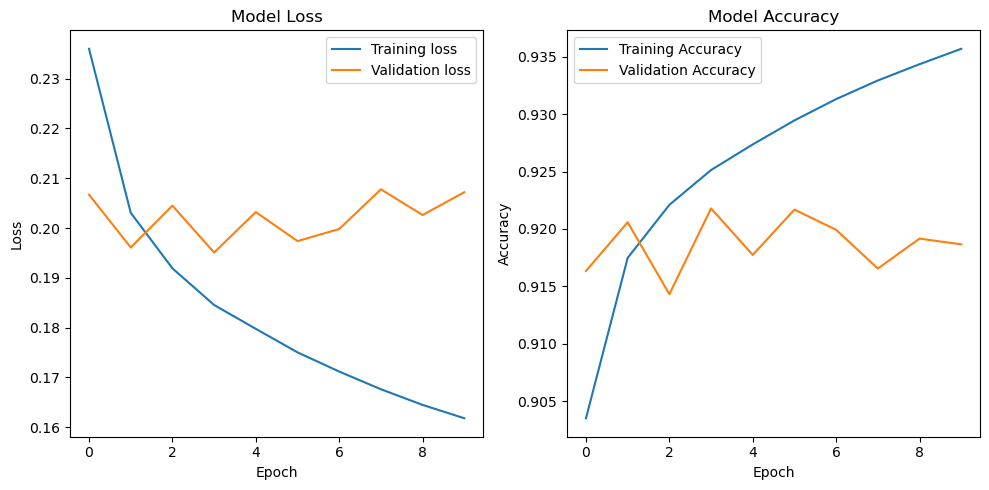

In [21]:
plot_loss_and_accuracy(history)